# Recruiting Metrics Analysis

This notebook provides an in-depth analysis of key recruiting metrics to help optimize hiring processes, reduce costs, and improve efficiency.

## 1. Dataset Overview

The dataset contains **1000** recruiting records **from January to July 2024**, tracking the entire recruitment pipeline from application to hire. Here are the key insights:


**1.1 Scale and Scope:**
   - The dataset tracks hundreds of job applications across multiple positions
   - Covers 5 key job roles: Software Engineer, Data Analyst, Business Analyst, Product Manager and UX Designer

**1.2 Recruitment Channels:**
   - Multiple recruitment sources including Company Website, LinkedIn, CareerBuilder, Indeed, and Referrals


**1.3 Application Pipeline:**
   - Tracks complete recruitment lifecycle: Application → Interview → Offer → Hire/Reject
   - Includes detailed timing for each stage of the process
   - Captures both successful (hired) and unsuccessful (rejected) outcomes

**1.4. Performance Metrics:**
   - Time-to-hire tracking for successful placements
   - Cost-per-hire data for financial analysis
   - Candidate NPS scores for satisfaction measurement
   - Recruitment site visits and social mentions for channel effectiveness

**1.5 Quality Indicators:**
   - Performance ratings for hired candidates
   - Offer acceptance rates
   - Candidate experience metrics (NPS)
   - Social engagement metrics

## 2. Dataset Citation
- **Title**: [Recruiting Key Performance Indicators](<https://www.kaggle.com/datasets/aidakooh/recruiting-key-performance-indicators>)
- **Author**: aida kooh
- **Source**: Kaggle
- **Accessed on**: Dec 27, 2024

## 3. Data Preprocessing and Analysis
#### Building the Foundation for Recruitment Funnel Analysis

In [84]:
import pandas as pd

# Load the dataset into the 'data' variable
data = pd.read_csv('recruiting_kpi_dataset_updated.csv')

# Convert the 'ApplicationDate' column to datetime format
data['ApplicationDate'] = pd.to_datetime(data['ApplicationDate'], errors='coerce')

In [7]:
# Add Quarter and Month columns
data['ApplicationQuarter'] = data['ApplicationDate'].dt.to_period('Q')  # Extract quarters
data['ApplicationMonth'] = data['ApplicationDate'].dt.to_period('M')   # Extract months

# Check the new columns
data[['ApplicationDate', 'ApplicationQuarter', 'ApplicationMonth']].head()

,ApplicationDate,ApplicationQuarter,ApplicationMonth
0,2024-02-03,2024Q1,2024-02
1,2024-07-01,2024Q3,2024-07
2,2024-02-21,2024Q1,2024-02
3,2024-03-03,2024Q1,2024-03
4,2024-04-24,2024Q2,2024-04


In [33]:
# Quarterly funnel statistics
quarterly_funnel = data.groupby('ApplicationQuarter').agg({
    'CandidateID': 'nunique',  # Total number of applicants
    'InterviewDate': lambda x: x.notna().sum(),  # Candidates who had interviews
    'OfferDate': lambda x: x.notna().sum(),  # Candidates who received offers
    'HiredDate': lambda x: x.notna().sum()  # Candidates who were hired
}).rename(columns={
    'CandidateID': 'Applied',
    'InterviewDate': 'Interviewed',
    'OfferDate': 'Offer Made',
    'HiredDate': 'Hired'
})

print(quarterly_funnel)

                    Applied  Interviewed  Offer Made  Hired
ApplicationQuarter                                         
2024Q1                  463          245         121     50
2024Q2                  455          221         107     31
2024Q3                   82           40          15      3


In [35]:
# Monthly funnel statistics
monthly_funnel = data.groupby('ApplicationMonth').agg({
    'CandidateID': 'nunique',
    'InterviewDate': lambda x: x.notna().sum(),
    'OfferDate': lambda x: x.notna().sum(),
    'HiredDate': lambda x: x.notna().sum()
}).rename(columns={
    'CandidateID': 'Applied',
    'InterviewDate': 'Interviewed',
    'OfferDate': 'Offer Made',
    'HiredDate': 'Hired'
})

print(monthly_funnel)

                  Applied  Interviewed  Offer Made  Hired
ApplicationMonth                                         
2024-01               155           92          45     15
2024-02               132           70          38     13
2024-03               176           83          38     22
2024-04               143           68          36     13
2024-05               163           86          41      9
2024-06               149           67          30      9
2024-07                82           40          15      3


### 3.1 Recruitment Funnel Analysis 

#### Creating Time-Based Funnel Analysis with Monthly and Quarterly Views


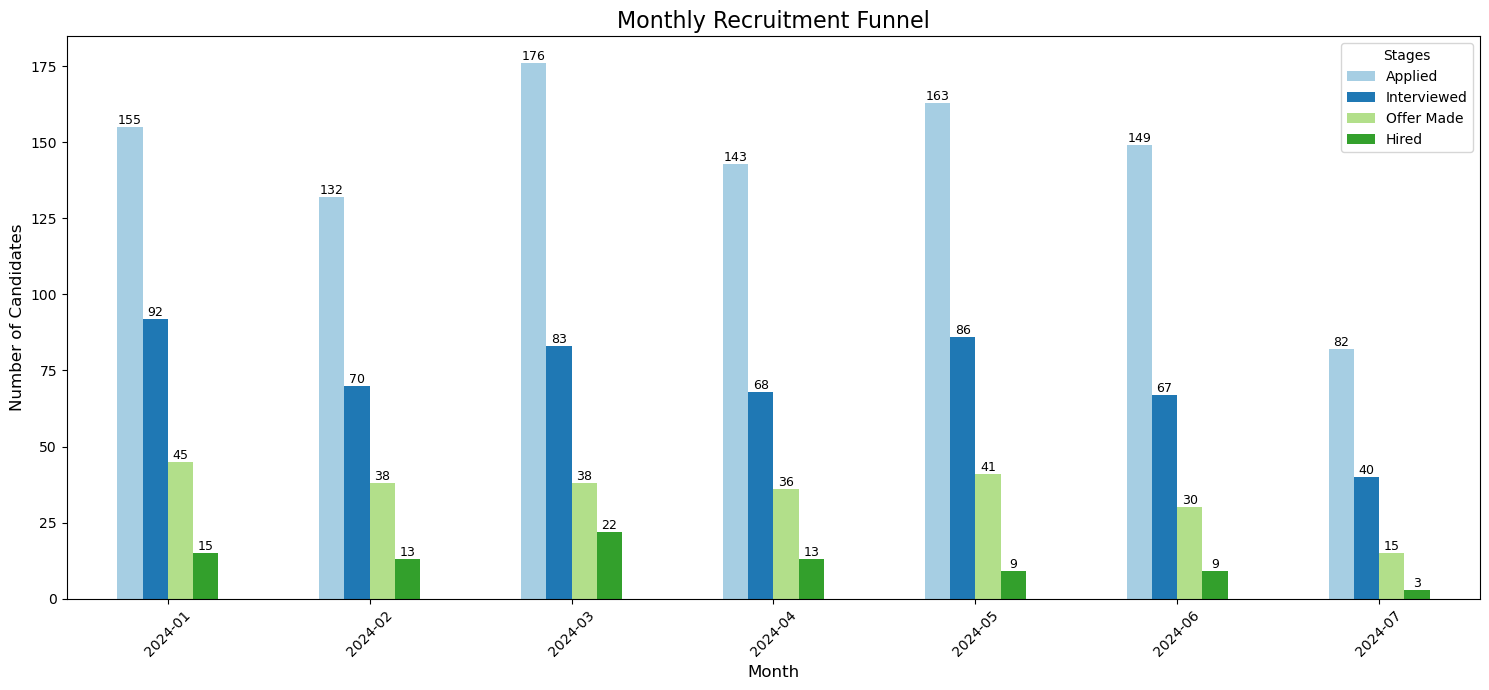

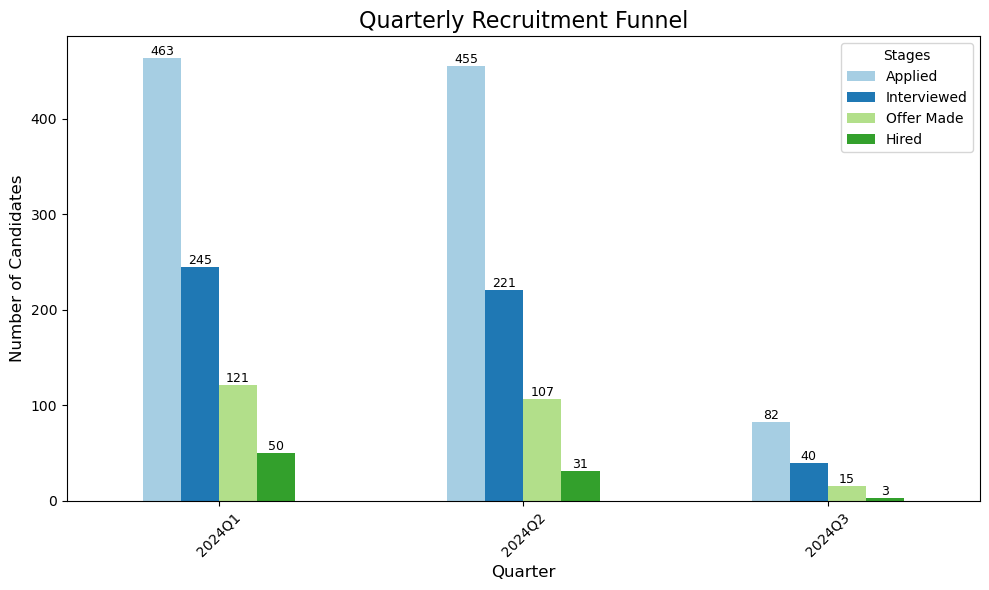

In [40]:


# Ensure 'ApplicationDate' is already converted to datetime
data['ApplicationMonth'] = data['ApplicationDate'].dt.to_period('M')  # Extract months
data['ApplicationQuarter'] = data['ApplicationDate'].dt.to_period('Q')  # Extract quarters

# Group by month and quarter to calculate Recruitment Funnel
monthly_funnel = data.groupby('ApplicationMonth').agg({
    'CandidateID': 'nunique',  # Total applicants
    'InterviewDate': lambda x: x.notna().sum(),  # Interviewed candidates
    'OfferDate': lambda x: x.notna().sum(),  # Offers made
    'HiredDate': lambda x: x.notna().sum()  # Hired candidates
}).rename(columns={
    'CandidateID': 'Applied',
    'InterviewDate': 'Interviewed',
    'OfferDate': 'Offer Made',
    'HiredDate': 'Hired'
})

quarterly_funnel = data.groupby('ApplicationQuarter').agg({
    'CandidateID': 'nunique',  # Total applicants
    'InterviewDate': lambda x: x.notna().sum(),  # Interviewed candidates
    'OfferDate': lambda x: x.notna().sum(),  # Offers made
    'HiredDate': lambda x: x.notna().sum()  # Hired candidates
}).rename(columns={
    'CandidateID': 'Applied',
    'InterviewDate': 'Interviewed',
    'OfferDate': 'Offer Made',
    'HiredDate': 'Hired'
})

# Reset index to display months and quarters as columns
monthly_funnel.reset_index(inplace=True)
quarterly_funnel.reset_index(inplace=True)

# Elegant color palette
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c']  # Light pastel colors

# Bar Chart for Monthly Recruitment Funnel
fig, ax = plt.subplots(figsize=(15, 7))
bars = monthly_funnel.plot(
    x='ApplicationMonth',
    kind='bar',
    stacked=False,
    ax=ax,
    color=colors
)

# Add numbers on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.title('Monthly Recruitment Funnel', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Stages', fontsize=10)
plt.tight_layout()
plt.show()

# Bar Chart for Quarterly Recruitment Funnel
fig, ax = plt.subplots(figsize=(10, 6))
bars = quarterly_funnel.plot(
    x='ApplicationQuarter',
    kind='bar',
    stacked=False,
    ax=ax,
    color=colors
)

# Add numbers on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.title('Quarterly Recruitment Funnel', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Stages', fontsize=10)
plt.tight_layout()
plt.show()


#### Key Findings：

**Quarterly Analysis**
 
**Q1 2024 Performance**

- Highest number of applications (463)
- Strongest conversion to hires (50 candidates)
- Interview conversion rate: 52.9% (245/463)
- Offer acceptance rate: 41.3% (50/121)

**Q2 2024 Performance**

- Similar application volume (455)
- Lower hiring yield (31 candidates)
- Interview conversion rate: 48.6% (221/455)
- Offer acceptance rate: 29% (31/107)

**Q3 2024 (Partial Data)**

- Significant drop in applications (82)
- Lowest hiring numbers (3)
- Similar conversion ratios maintained

**Monthly Trends**

**Application Volume**

- Peak in March 2024 (176 applications)
- Consistent volume Jan-June (132-176 applications)
- Sharp decline in July (82 applications)

**Conversion Metrics**

- Application to Interview rate: ~45-55%
- Interview to Offer rate: ~40-50%
- Offer to Hire rate: Declining trend (33% in Jan to 20% in July)

**Hiring Efficiency**

- Best month: March 2024 (22 hires)
- Declining trend in recent months (9 hires in May/June, 3 in July)
- Average monthly hire rate: ~12 candidates


**The recruitment funnel data from Q1-Q3 2024 reveals several important patterns and trends**

- The organization maintained a robust applicant pipeline in the first half of the year, with consistent monthly application volumes between 132-176 candidates. However, there's a clear decline in hiring efficiency over time, particularly in the conversion from offers to hires.
- While the initial stages of the funnel (application to interview) remain relatively stable, the final conversion rates have deteriorated.
- Q1 2024 emerged as the strongest period, with both high application volumes and superior conversion rates throughout the funnel.
- The subsequent quarters show a gradual decline in hiring effectiveness, despite maintaining similar application numbers through Q2.
- The sharp drop in July (Q3) applications and hires might indicate either a seasonal trend or a more systemic change in recruitment strategy or market conditions.

In [25]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


### 3.2 Time to Hire by Position


Detailed Hiring Time Statistics by Position:

Position Time Analysis:
                   average_days  median_days  min_days  max_days  hire_count
Position                                                                    
Software Engineer          84.4         76.5      15.0     193.0          14
Product Manager            92.4        108.0       2.0     165.0          26
Business Analyst          112.4        117.0      24.0     187.0          17
UX Designer               112.7        114.0      29.0     183.0          15
Data Analyst              113.8        126.5       4.0     175.0          12

Overall Statistics:
Average time to hire across all positions: 101.8 days
Fastest hire: 2.0 days
Longest hire: 193.0 days


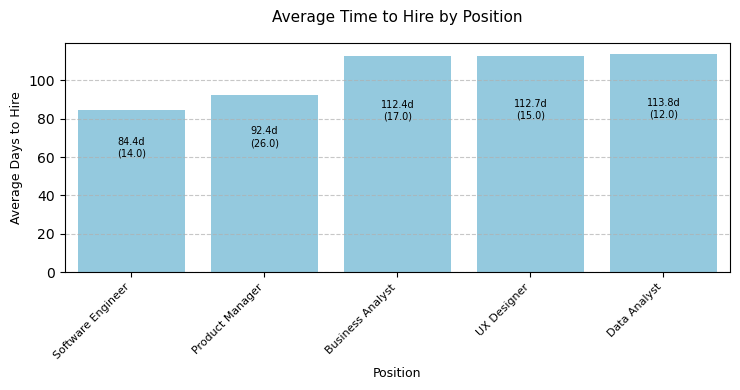

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_position_hiring_time(file_path):
    # Read data
    df = pd.read_csv(file_path)
    
    # Calculate average hiring time by position
    position_time = df.groupby('Position')['TimeToHire'].agg([
        ('average_days', 'mean'),
        ('median_days', 'median'),
        ('min_days', 'min'),
        ('max_days', 'max'),
        ('hire_count', 'count')
    ]).round(1)
    
    # Sort by average hiring time
    position_time = position_time.sort_values('average_days', ascending=True)
    
    # Create figure with reduced size (7.5, 4) which is 50% of original (15, 8)
    plt.figure(figsize=(7.5, 4))
    
    # Create bar plot with adjusted style for smaller size
    ax = sns.barplot(x=position_time.index, 
                    y='average_days', 
                    data=position_time,
                    color='skyblue')
    
    # Add value labels with smaller font size and adjusted position
    for idx, (position, row) in enumerate(position_time.iterrows()):
        ax.text(idx, row['average_days'] * 0.7,
                f'{row["average_days"]:.1f}d\n({row["hire_count"]})', 
                ha='center', va='bottom', fontsize=7)  # Reduced font size from 9 to 7
    
    # Set chart style with adjusted font sizes
    plt.title('Average Time to Hire by Position', fontsize=11, pad=15)  # Reduced from 14
    plt.xlabel('Position', fontsize=9)  # Reduced from 12
    plt.ylabel('Average Days to Hire', fontsize=9)  # Reduced from 12
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Added fontsize parameter
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Print detailed statistics
    print("\nDetailed Hiring Time Statistics by Position:")
    print("\nPosition Time Analysis:")
    print(position_time.to_string())
    
    # Calculate overall statistics
    print("\nOverall Statistics:")
    print(f"Average time to hire across all positions: {df['TimeToHire'].mean():.1f} days")
    print(f"Fastest hire: {df['TimeToHire'].min():.1f} days")
    print(f"Longest hire: {df['TimeToHire'].max():.1f} days")
    
    # Show plot
    plt.show()

# Run the analysis
analyze_position_hiring_time('recruiting_kpi_dataset_updated.csv')

#### Finding

A hiring cycle of average 101.8 days is indeed quite long. Typically, the length of the hiring process can be influenced by various factors, such as the nature of the positions, the size of the company, the complexity of the recruitment process, and the competitiveness of the job market.

For technical roles like Software Engineer, Data Analyst, or UX Designer, a longer process may be expected due to the need for multiple rounds of interviews, coding tests, and skills assessments. However, anything beyond three months does seem excessive, which may suggest inefficiencies in the recruitment process.

#### Potential Drivers for a lengthy hiring cycle 
- Highly specific or demanding job requirements, making it difficult to find candidates that match the profile, thus prolonging the screening and interview process.
- Multiple interview rounds, with long gaps between them or involving different decision-makers who need to coordinate.
- Poor internal communication, where various departments are involved in decision-making, causing delays.
- Imbalance in the external talent market, especially for technical roles, where qualified candidates are limited or in high demand, and companies might take longer to identify suitable applicants.

#### Recommended Actions
A lengthy hiring process can hurt the candidate experience and may lead to losing top candidates who find other offers in the meantime. To optimize the process, companies could consider:
- Streamlining interview rounds and cutting unnecessary steps.
- Speeding up feedback and response times.
- Improving collaboration between the recruitment team and other departments to reduce delays in decision-making.
- Using more efficient screening tools, such as AI-driven resume filtering.

### 3.3 Offer Acceptance Rate Analysis




Monthly Offer Acceptance Statistics:
  Month  OfferAccepted  OfferDate  Acceptance_Rate
2024-01              0          1         0.000000
2024-02              0          4         0.000000
2024-03              3          7        42.857143
2024-04              3         15        20.000000
2024-05              7         16        43.750000
2024-06             31         68        45.588235
2024-07             40        132        30.303030

Position-wise Offer Acceptance Statistics:
         Position  OfferAccepted  OfferDate  Acceptance_Rate
     Data Analyst             12         45        26.666667
Software Engineer             14         50        28.000000
      UX Designer             15         50        30.000000
 Business Analyst             17         40        42.500000
  Product Manager             26         58        44.827586


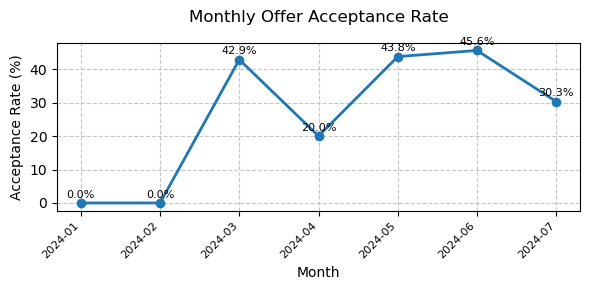

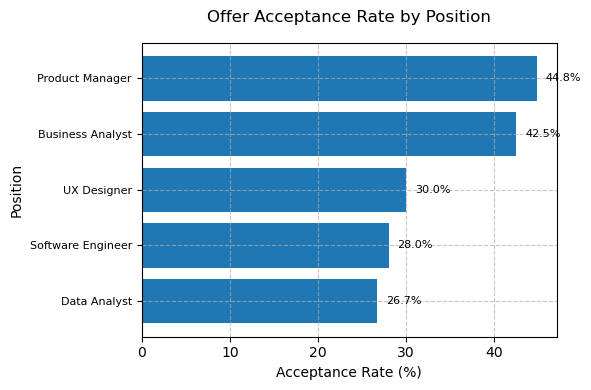

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the CSV file
df = pd.read_csv('recruiting_kpi_dataset_updated.csv')
# Convert date columns to datetime
df['OfferDate'] = pd.to_datetime(df['OfferDate'])

def analyze_offer_acceptance_by_month(df):
    # Extract month and year from OfferDate
    df['Month'] = df['OfferDate'].dt.strftime('%Y-%m')
    
    # Group by month and calculate acceptance rate
    monthly_stats = df.groupby('Month').agg({
        'OfferAccepted': lambda x: (x == 'Yes').sum(),
        'OfferDate': 'count'
    }).reset_index()
    
    monthly_stats['Acceptance_Rate'] = (monthly_stats['OfferAccepted'] / 
                                      monthly_stats['OfferDate'] * 100)
    
    # Create the visualization with reduced figure size (6, 3) instead of (12, 6)
    plt.figure(figsize=(6, 3))  # Changed from (12, 6)
    plt.plot(range(len(monthly_stats)), monthly_stats['Acceptance_Rate'], 
             marker='o', linewidth=2, markersize=6)  # Reduced markersize from 8 to 6
    
    plt.title('Monthly Offer Acceptance Rate', fontsize=12, pad=15)  # Reduced font sizes
    plt.xlabel('Month', fontsize=10)
    plt.ylabel('Acceptance Rate (%)', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.xticks(range(len(monthly_stats)), monthly_stats['Month'], 
               rotation=45, ha='right', fontsize=8)  # Reduced tick font size
    
    # Add smaller value labels
    for i, rate in enumerate(monthly_stats['Acceptance_Rate']):
        plt.text(i, rate + 1, f'{rate:.1f}%', 
                ha='center', va='bottom', fontsize=8)  # Reduced font size
    
    plt.tight_layout()
    return monthly_stats

def analyze_offer_acceptance_by_position(df):
    position_stats = df.groupby('Position').agg({
        'OfferAccepted': lambda x: (x == 'Yes').sum(),
        'OfferDate': 'count'
    }).reset_index()
    
    position_stats['Acceptance_Rate'] = (position_stats['OfferAccepted'] / 
                                       position_stats['OfferDate'] * 100)
    
    position_stats = position_stats.sort_values('Acceptance_Rate', ascending=True)
    
    # Create the visualization with reduced figure size (6, 4) instead of (12, 8)
    plt.figure(figsize=(6, 4))  # Changed from (12, 8)
    bars = plt.barh(range(len(position_stats)), position_stats['Acceptance_Rate'])
    
    plt.title('Offer Acceptance Rate by Position', fontsize=12, pad=15)  # Reduced font sizes
    plt.xlabel('Acceptance Rate (%)', fontsize=10)
    plt.ylabel('Position', fontsize=10)
    
    plt.yticks(range(len(position_stats)), position_stats['Position'], fontsize=8)  # Reduced font size
    
    # Add smaller value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%',
                va='center', fontsize=8)  # Reduced font size
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    return position_stats

# Create visualizations and get statistics
monthly_stats = analyze_offer_acceptance_by_month(df)
plt.figure(1)
position_stats = analyze_offer_acceptance_by_position(df)
plt.figure(2)

# Print detailed statistics
print("\nMonthly Offer Acceptance Statistics:")
print(monthly_stats.to_string(index=False))
print("\nPosition-wise Offer Acceptance Statistics:")
print(position_stats.to_string(index=False))
plt.show()



#### Finding: Lower Than Expected Acceptance Rates in Technical Roles 
Our analysis reveals that technical positions are experiencing significantly lower offer acceptance rates, with Data Analysts at 26.7% and Software Engineers at 28%, compared to the overall company average of 34.4%.

#### Potential Drivers

- The competitive landscape for technical talent has intensified significantly, with candidates often receiving multiple competitive offers simultaneously. This has created a highly candidate-driven market where prospective employees have increased negotiating power and more options to choose from.

- Our compensation structure may not fully align with current market expectations. While our base salary remains competitive, our analysis suggests that the total compensation package, including bonuses, equity, and benefits, may not match what market leaders are offering in the technology sector.

- The length and complexity of our technical interview process may be impacting candidate experience. Candidates are going through multiple rounds of technical assessments and interviews, which extends the time from initial contact to offer. This prolonged process gives competitors more opportunity to engage with our candidates.

#### Recommended Solutions

- Compensation Strategy Enhancement:
Our compensation structure needs to be more dynamic and competitive. We should implement monthly market rate reviews for technical positions and create a more flexible compensation framework that can quickly adapt to market changes. This framework should include clear career progression paths with associated compensation bands, making the growth potential more visible to candidates.

- Interview Process Optimization:
We should streamline our technical assessment process while maintaining its rigor. This can be achieved by consolidating technical evaluations into fewer, more comprehensive sessions and establishing clear timelines for each stage of the interview process. Additionally, implementing a dedicated technical recruitment team would ensure consistent and specialized candidate experience.

- Build Strategic Partnership with Employer Branding:
Our acceptance rate data presents a compelling case for strengthening collaboration with the Employer Branding team to address the technical talent attraction challenges. By sharing our recruitment insights, particularly the feedback from declined offers and candidate interviews, we can help inform the development of more targeted employer branding content for technical roles. This data-driven approach would enable the Employer Branding team to craft more resonant messaging around our technical environment, project impact, and growth opportunities - areas our analysis shows candidates care most about. Regular collaboration between recruitment and employer branding teams, supported by ongoing data sharing, would create a stronger foundation for future technical hiring success.

### 3.4 Cost Variations Across Different Positions

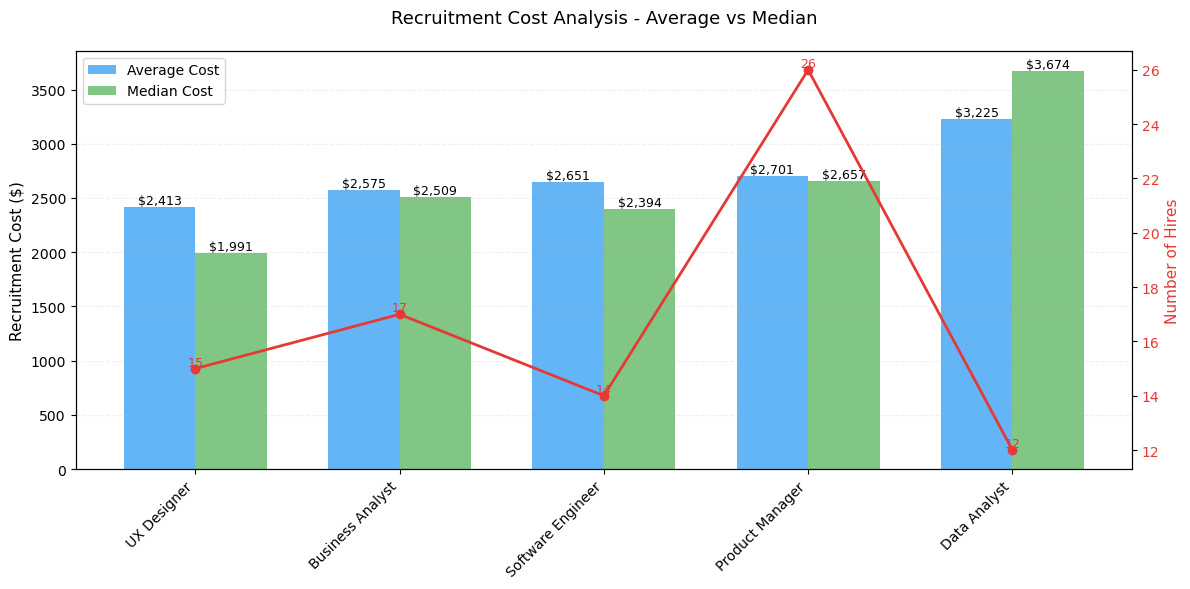


Detailed Recruitment Statistics:

By Position:
         Position  Hire_Count  Average_Cost  Median_Cost  Min_Cost  Max_Cost
      UX Designer          15       2412.83      1991.04    627.29   4941.31
 Business Analyst          17       2574.71      2509.27    519.33   4507.36
Software Engineer          14       2651.25      2394.29    570.42   4599.38
  Product Manager          26       2700.54      2656.94    571.77   4900.81
     Data Analyst          12       3225.07      3673.62    895.05   4837.67

Overall Recruitment Metrics:
Total Recruitment Spend: $225,994.95
Average Cost per Hire: $2,690.42
Median Cost per Hire: $2,519.55


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Configure font settings
plt.rcParams['font.family'] = 'DejaVu Sans'

# Read and process the recruitment data
df = pd.read_csv('recruiting_kpi_dataset_updated.csv')

# Calculate metrics including median
position_analysis = df.groupby('Position').agg({
    'HireCost': ['mean', 'median', 'count', 'min', 'max']
}).round(2)

# Flatten the column structure for easier handling
position_analysis.columns = ['Average_Cost', 'Median_Cost', 'Hire_Count', 'Min_Cost', 'Max_Cost']
position_analysis = position_analysis.reset_index()

# Sort by average cost for consistent visualization
position_analysis = position_analysis.sort_values('Average_Cost', ascending=True)

# Create the visualization
plt.figure(figsize=(12, 6))
ax1 = plt.gca()

# Set the width for our bars
x = range(len(position_analysis))
width = 0.35

# Create grouped bars for median and average costs
bars1 = ax1.bar([i - width/2 for i in x], position_analysis['Average_Cost'], 
                width, label='Average Cost', color='#2196F3', alpha=0.7)
bars2 = ax1.bar([i + width/2 for i in x], position_analysis['Median_Cost'], 
                width, label='Median Cost', color='#4CAF50', alpha=0.7)

# Add value labels to both sets of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height,
                f'${height:,.0f}',
                ha='center', va='bottom', fontsize=9,
                fontfamily='DejaVu Sans')

add_value_labels(bars1)
add_value_labels(bars2)

# Create second y-axis for number of hires
ax2 = ax1.twinx()

# Add line for number of hires
line = ax2.plot(position_analysis['Position'], 
                position_analysis['Hire_Count'],
                color='#E53935',
                marker='o',
                linewidth=2,
                label='Number of Hires')

# Add hire count labels
for i, count in enumerate(position_analysis['Hire_Count']):
    ax2.text(i, count,
             str(int(count)),
             ha='center', va='bottom',
             color='#E53935',
             fontsize=9,
             fontfamily='DejaVu Sans')

# Set labels and title
ax1.set_ylabel('Recruitment Cost ($)', fontsize=11, fontfamily='DejaVu Sans')
ax2.set_ylabel('Number of Hires', color='#E53935', fontsize=11, fontfamily='DejaVu Sans')
plt.title('Recruitment Cost Analysis - Average vs Median', fontsize=13, pad=20)

# Customize axes
ax1.set_xticks(x)
ax1.set_xticklabels(position_analysis['Position'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.2)
ax2.tick_params(axis='y', labelcolor='#E53935')

# Add legend
ax1.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the visualization
plt.show()

# Print detailed statistics
print("\nDetailed Recruitment Statistics:")
stats_display = position_analysis[['Position', 'Hire_Count', 'Average_Cost', 'Median_Cost', 'Min_Cost', 'Max_Cost']]
print("\nBy Position:")
print(stats_display.to_string(index=False))

# Print overall metrics
print(f"\nOverall Recruitment Metrics:")
print(f"Total Recruitment Spend: ${df['HireCost'].sum():,.2f}")
print(f"Average Cost per Hire: ${df['HireCost'].mean():,.2f}")
print(f"Median Cost per Hire: ${df['HireCost'].median():,.2f}")



#### Key Finding: Data Analyst Positions Show Highest Recruitment Costs 

Our analysis reveals significant variations in recruitment costs:

- Highest Cost Position: Data Analyst roles stand out with an average cost of $3,225 per hire
  
- Above Company Average: This represents a 20% premium over the company-wide average of $2,690
  
- Most Cost-Efficient: UX Designer positions show the lowest recruitment costs at $2,413 per hire


#### Potential Drivers
The substantial cost variations between different positions can be attributed to multiple underlying factors in the current talent market and our recruitment processes. The consistently high median cost ($3,674) for Data Analyst positions reflects the intense competition in the data talent market, combined with a relatively limited candidate pool for these specialized roles. This competitive landscape often necessitates more extensive recruitment efforts and potentially higher investment in candidate attraction and assessment processes.

When examining the UX Designer recruitment data, we observe a notably more efficient cost structure with both a lower mean cost USD 2,413 and a significantly lower median USD 1,991. These metrics suggest that our recruitment process for UX positions has achieved a higher level of optimization and standardization. The efficiency might be attributed to our well-established assessment methods for UX candidates and potentially a more abundant talent pool in this domain.

#### Recommended Solutions
Based on our comprehensive data analysis, we recommend implementing a two-pronged approach to optimize recruitment costs across all positions:

First, we need to develop a specialized strategy for Data Analyst recruitment that focuses on building long-term talent pipelines. This approach should include the development of relationships with key educational institutions and professional networks, combined with a more structured internal development program for data talent. By investing in these relationships and development pathways, we can reduce our dependence on expensive urgent hiring processes.

Second, we should conduct a detailed analysis of our successful UX Designer recruitment practices and identify elements that can be adapted for other positions. The cost-efficient processes we've established for UX recruitment could serve as a model for optimizing recruitment across other roles, particularly in areas such as assessment standardization and candidate pipeline management.


### 3.5 Recruiters' Performance Analysis

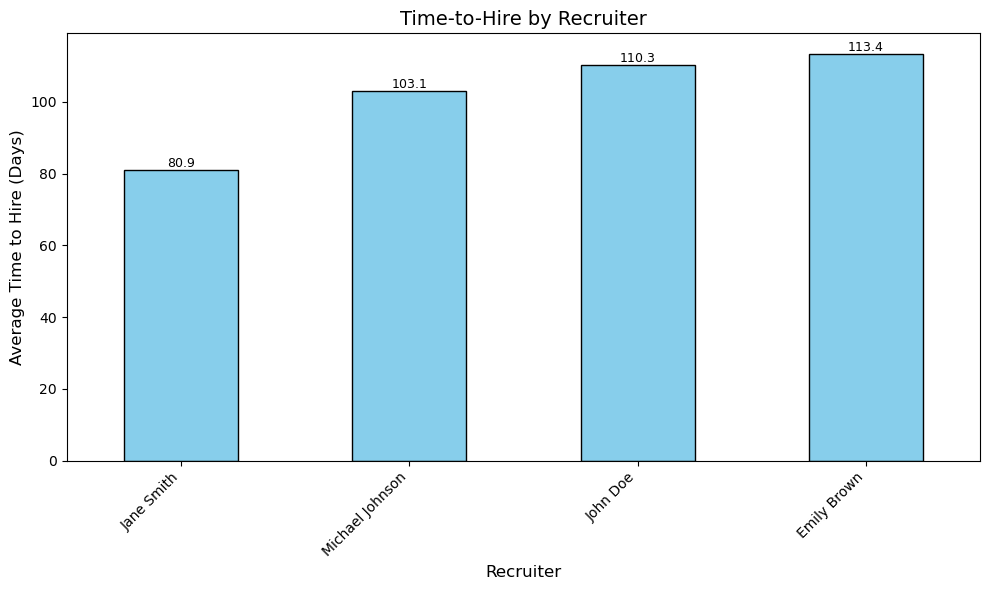

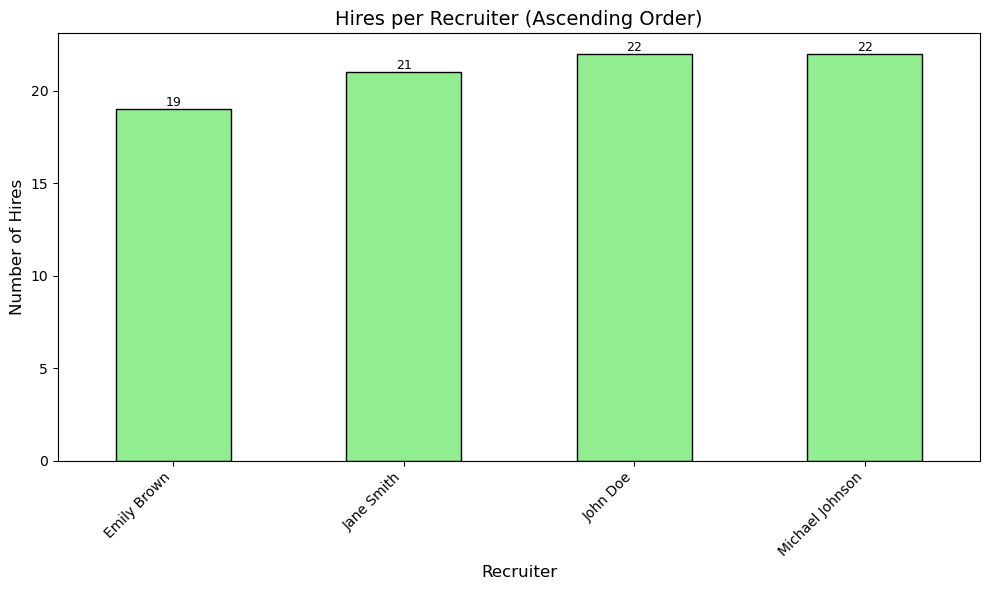

In [27]:
import pandas as pd
import matplotlib.pyplot as plt  # Add this import at the top

# [Your existing data loading and processing code remains the same]

# Create the first figure
plt.figure(figsize=(10, 6))  # Creates a new figure window of size 10x6 inches
bars = time_to_hire_by_recruiter.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Time-to-Hire by Recruiter', fontsize=14)  # Sets the title with specified font size
plt.xlabel('Recruiter', fontsize=12)  # Labels the x-axis
plt.ylabel('Average Time to Hire (Days)', fontsize=12)  # Labels the y-axis
plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability

# Add value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()  # Displays the first plot

# Create the second figure
plt.figure(figsize=(10, 6))  # Creates a new figure for the second plot
bars = hires_per_recruiter.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Hires per Recruiter (Ascending Order)', fontsize=14)
plt.xlabel('Recruiter', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()  # Displays the second plot



#### Key Findings：


**Time-to-Hire Performance**

***Overall Time-to-Hire Range***
- Fastest: Jane Smith (80.9 days)
- Slowest: Emily Brown (113.4 days)
- Average across recruiters: ~102 days


***Recruiter Speed Comparison***
- Jane Smith performs significantly faster (-22% vs slowest)
- Minimal difference between other recruiters (103-113 days)
- ~32.5 day gap between fastest and slowest recruiter


**Hiring Volume Performance**

***Total Hires Distribution***
- Top performers: Michael Johnson & John Doe (22 hires each)
- Jane Smith: 21 hires
- Emily Brown: 19 hires
- Very consistent performance across team (19-22 range)

***Team Productivity***
- Total team hires: 84 candidates
- Average hires per recruiter: 21 candidates
- Small variance in hiring numbers (±1.5 from mean)


#### Insights：

***Efficiency vs Volume Trade-off***
- Jane Smith shows best balance of speed and volume (fastest TTH with 21 hires)
- Emily Brown has opportunity for process optimization (slowest TTH but similar hire volume)
- Michael Johnson and John Doe achieve highest volumes despite longer TTH

***Process Standardization***
- Consistent hiring volumes suggest good process standardization
- Significant TTH variations indicate different working methods
- Opportunity to analyze Jane Smith's faster process for best practices

***Recommendations***
- Share Jane Smith's recruitment practices with team
- Investigate causes of longer TTH for Emily Brown
- Consider setting team TTH benchmark around 90 days
- Maintain current workload distribution as volumes are well-balanced